# ベーシックステップ
# 機械学習 PBL - 電力データを整理し現状を俯瞰する - サンプルコード
copyright 2019 DataMix Co.,Ltd.

In [19]:
import pandas as pd
pd.set_option('display.max_rows', 500)
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
print(plt.rcParams['figure.figsize'])  # この値が使われる
plt.rcParams['figure.figsize'] = (12 ,12)

from datetime import datetime as dt

[6.0, 4.0]


#### `electric_power_data_2014.csv`を読み込みます
本ファイル(.ipynb)と electric_power_data_2014.csv の保存先に注意してください

In [4]:
dataset = pd.read_csv("electric_power_data_2014.csv")

In [6]:
dataset.head()

#display(dataset)

,time,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
0,2014-01-01 00:00:00,2.53807,24.004250,0.434405,148.88225,75.609750,276.04150,6.642168,247.47450,51.136375,...,100.285500,15475,1161.39275,1011.36375,17.275100,9.362220,237.48900,46.327225,724.70650,7351.3525
1,2014-01-01 01:00:00,2.85533,23.293000,0.000000,145.83325,71.036575,233.63075,5.935555,249.99975,52.010525,...,71.556025,14875,638.18550,909.09100,16.949175,11.410175,227.83125,48.414025,680.90175,7027.0250
2,2014-01-01 02:00:00,2.85533,24.537700,0.000000,142.27650,64.939000,212.79775,5.511587,251.68325,52.884650,...,68.522500,14850,573.83975,880.68175,17.926975,10.239923,199.73675,50.500825,664.40600,6689.1875
3,2014-01-01 03:00:00,2.85533,21.870575,0.000000,127.03250,64.634150,179.31550,5.935555,207.91225,46.765725,...,68.344050,14275,565.40075,857.95425,16.949175,10.239920,183.71350,46.327225,700.69650,6351.3525
4,2014-01-01 04:00:00,2.53807,22.226200,0.000000,111.28050,57.621950,156.25025,4.946298,191.07725,41.958025,...,68.879375,13400,558.01700,863.63600,17.601050,8.045650,186.12825,47.579325,678.51925,6837.8375


In [7]:
dataset.shape

(8760, 371)

#### カラム`"time"`をdatetime型に変換します

In [8]:
dataset["time"] = pd.to_datetime(dataset["time"])

#### データサイズが大きいので、サンプルコードでは分析に使うデータを`2014年1月分`のデータに絞ります
演習本番では適宜使用するデータ期間を変更してください

In [9]:
#dataset_January = dataset[dataset["time"] < "2014-02-01"]
dataset

,time,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
0,2014-01-01 00:00:00,2.538070,24.004250,0.434405,148.882250,75.609750,276.04150,6.642168,247.47450,51.136375,...,100.285500,15475,1161.39275,1011.36375,17.275100,9.362220,237.48900,46.327225,724.70650,7351.3525
1,2014-01-01 01:00:00,2.855330,23.293000,0.000000,145.833250,71.036575,233.63075,5.935555,249.99975,52.010525,...,71.556025,14875,638.18550,909.09100,16.949175,11.410175,227.83125,48.414025,680.90175,7027.0250
2,2014-01-01 02:00:00,2.855330,24.537700,0.000000,142.276500,64.939000,212.79775,5.511587,251.68325,52.884650,...,68.522500,14850,573.83975,880.68175,17.926975,10.239923,199.73675,50.500825,664.40600,6689.1875
3,2014-01-01 03:00:00,2.855330,21.870575,0.000000,127.032500,64.634150,179.31550,5.935555,207.91225,46.765725,...,68.344050,14275,565.40075,857.95425,16.949175,10.239920,183.71350,46.327225,700.69650,6351.3525
4,2014-01-01 04:00:00,2.538070,22.226200,0.000000,111.280500,57.621950,156.25025,4.946298,191.07725,41.958025,...,68.879375,13400,558.01700,863.63600,17.601050,8.045650,186.12825,47.579325,678.51925,6837.8375
5,2014-01-01 05:00:00,2.538070,21.514925,0.000000,105.183000,62.804875,143.60125,4.381007,175.08400,40.209775,...,115.453150,13600,720.46400,857.95425,16.949175,13.019300,207.85775,44.657775,694.46475,6527.0275
6,2014-01-01 06:00:00,3.172590,21.692750,0.000000,97.052850,58.841475,142.85725,4.663653,166.66650,38.461525,...,129.550500,13200,775.31625,1136.36575,16.949175,12.434200,203.46800,45.492475,693.36525,6635.1350
7,2014-01-01 07:00:00,2.855330,21.870550,0.000000,89.939025,57.926825,142.11325,4.522330,143.09750,36.713275,...,111.527500,13350,755.27425,1193.18250,17.275100,8.630775,164.39850,45.909875,689.88300,6445.9450
8,2014-01-01 08:00:00,1.269038,22.759600,0.000000,68.597575,49.390250,127.23225,3.674395,114.47800,50.699300,...,109.921750,14275,699.36700,1687.50000,16.949175,8.630785,138.93750,45.909850,663.67300,6810.8125
9,2014-01-01 09:00:00,0.317260,25.248950,0.000000,92.987800,44.512200,143.60150,4.522330,123.73725,59.440550,...,166.666750,18875,998.94550,2204.54500,18.252900,10.093630,166.81300,45.492500,656.15825,6094.5950


#### 集計を行いやすいようにデータの持ち方を変換します
### https://qiita.com/ishida330/items/922caa7acb73c1540e28


In [10]:
#data = pd.melt(dataset_January,
#               id_vars=['time'], var_name="customer_id", value_name="power_usage")

data = pd.melt(dataset,
               id_vars=['time'], var_name="customer_id", value_name="power_usage")

In [11]:
data.head()

,time,customer_id,power_usage
0,2014-01-01 00:00:00,MT_001,2.53807
1,2014-01-01 01:00:00,MT_001,2.85533
2,2014-01-01 02:00:00,MT_001,2.85533
3,2014-01-01 03:00:00,MT_001,2.85533
4,2014-01-01 04:00:00,MT_001,2.53807


In [12]:
data.shape

(3241200, 3)

#### サンプルコードでは`hour`の情報を使い集計していきます
カラム`time`から`hour`の情報をライブラリ`datetime`を用いて取り出します
その他の情報のサンプルコードは以下の通りです
```python
data["year"] = data["time"].dt.year
data["month"] = data["time"].dt.month
data["day"] = data["time"].dt.day
data["dayofweek"] = data["time"].dt.strftime('%A')
```
# strftime 
### https://qiita.com/ryouzi/items/8dfd961cab514b1a5b58


In [32]:
data["hour"] = data["time"].dt.hour

data["year"] = data["time"].dt.year
data["month"] = data["time"].dt.month
data["day"] = data["time"].dt.day
data["dayofweek"] = data["time"].dt.strftime('%A')
data["day_week"] = data["time"].dt.strftime('%w')

In [33]:
data.head()

,time,customer_id,power_usage,hour,year,month,day,dayofweek,day_week
0,2014-01-01 00:00:00,MT_001,2.53807,0,2014,1,1,Wednesday,3
1,2014-01-01 01:00:00,MT_001,2.85533,1,2014,1,1,Wednesday,3
2,2014-01-01 02:00:00,MT_001,2.85533,2,2014,1,1,Wednesday,3
3,2014-01-01 03:00:00,MT_001,2.85533,3,2014,1,1,Wednesday,3
4,2014-01-01 04:00:00,MT_001,2.53807,4,2014,1,1,Wednesday,3


## 切り口を練るために可視化する

### ヒント1: Pandasによるデータの集計1: 集計関数を使う


### groupby + aggregateで集計する
使い方:  data.groupby([キーとなる列名]).aggregate({"集計対象の列名":集計関数}).reset_index()

In [15]:
total_power_usage_by_company = data.groupby(
    ["customer_id"]).aggregate({"power_usage": np.sum}).reset_index()
print(total_power_usage_by_company.shape)
total_power_usage_by_company.head()

(370, 2)


,customer_id,power_usage
0,MT_001,3.554951e+04
1,MT_002,2.337042e+05
2,MT_003,1.497503e+04
3,MT_004,1.060040e+06
4,MT_005,4.555406e+05


顧客ごとの1年間の総消費電力量をプロット

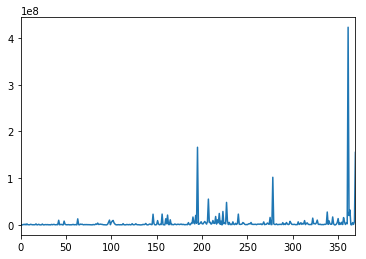

In [16]:
total_power_usage_by_company["power_usage"].plot(
    x="customer_id", y="power_usage")

### 時間別の消費電力量を集計する
ヒント:  data.groupby([キーとなる列名]).aggregate({"集計対象の列名":集計関数}).reset_index()

total_power_usage_by_company["power_usage"].plot(x="customer_id", y="power_usage")<br>
hourly_total_value = data.groupby(["hour"]).aggregate({"power_usage": np.sum}).reset_index()<br>
<   >hourly_total_value.plot(x="hour", y="power_usage")<br>
data_non_zero = data[data["power_usage"] > 0]<br>
hourly_total_count = data_non_zero.groupby(["hour"])["customer_id"].nunique()<br>

In [52]:
hourly_total_value = data.groupby(["hour"]).aggregate(
    {"power_usage": np.sum}).reset_index()
print("hourly_total_value", hourly_total_value.shape)
hourly_total_value2 = data.groupby(["hour"]).aggregate(
    {"power_usage": np.mean}).reset_index()
print("hourly_total_value2", hourly_total_value2.shape)

monthly_total_value = data.groupby(["month"]).aggregate(
    {"power_usage": np.sum}).reset_index()
print("monthly_total_value", monthly_total_value.shape)
monthly_total_value2 = data.groupby(["month"]).aggregate(
    {"power_usage": np.mean}).reset_index()
print("monthly_total_value2", monthly_total_value2.shape)

dayofweek_total_value5 = data.groupby(["dayofweek"]).aggregate(
    {"power_usage": np.sum}).reset_index()
print("dayofweek_total_value5", dayofweek_total_value5.shape)
dayofweek_total_value6 = data.groupby(["dayofweek"]).aggregate(
    {"power_usage": np.mean}).reset_index()
print("dayofweek_total_value6", dayofweek_total_value6.shape)

day_week_total_value3 = data.groupby(["day_week"]).aggregate(
    {"power_usage": np.sum}).reset_index()
print("day_week_total_value3", day_week_total_value3.shape)
day_week_total_value4 = data.groupby(["day_week"]).aggregate(
    {"power_usage": np.mean}).reset_index()
print("day_week_total_value4", day_week_total_value4.shape)
day_week_total_value = data.groupby(["day_week"]).aggregate(
    {"power_usage": np.sum}).reset_index().T
print("day_week_total_value", day_week_total_value.shape)
day_week_total_value2 = data.groupby(["day_week"]).aggregate(
    {"power_usage": np.mean}).reset_index().T
print("day_week_total_value2", day_week_total_value2.shape)

daily_total_value = data.groupby(["day"]).aggregate(
    {"power_usage": np.sum}).reset_index()
print("daily_total_value", daily_total_value.shape)
daily_total_value2 = data.groupby(["day"]).aggregate(
    {"power_usage": np.mean}).reset_index()
print("daily_total_value2", daily_total_value2.shape)

display(day_week_total_value3)
display(day_week_total_value4)
display(day_week_total_value)
display(day_week_total_value2)

hourly_total_value (24, 2)
hourly_total_value2 (24, 2)
monthly_total_value (12, 2)
monthly_total_value2 (12, 2)
dayofweek_total_value5 (7, 2)
dayofweek_total_value6 (7, 2)
day_week_total_value3 (7, 2)
day_week_total_value4 (7, 2)
day_week_total_value (2, 7)
day_week_total_value2 (2, 7)
daily_total_value (31, 2)
daily_total_value2 (31, 2)


,day_week,power_usage
0,0,2.751627e+08
1,1,2.772826e+08
2,2,2.815086e+08
3,3,2.834387e+08
4,4,2.794088e+08
5,5,2.850914e+08
6,6,2.839464e+08


,day_week,power_usage
0,0,595.899890
1,1,600.490809
2,2,609.642695
3,3,602.240911
4,4,605.095190
5,5,617.401689
6,6,614.922107


,0,1,2,3,4,5,6
day_week,0,1,2,3,4,5,6
power_usage,2.75163e+08,2.77283e+08,2.81509e+08,2.83439e+08,2.79409e+08,2.85091e+08,2.83946e+08


,0,1,2,3,4,5,6
day_week,0,1,2,3,4,5,6
power_usage,595.9,600.491,609.643,602.241,605.095,617.402,614.922


In [50]:
# errors can't be fixed yet

#day_week_total_value.plot()
#day_week_total_value2.plot()
#day_week_total_value3.T.plot()
#day_week_total_value4.T.plot()

https://qiita.com/ymd_/items/5e8a5db7f8147d76cd5f

Text(0,0.5,'power_usage')

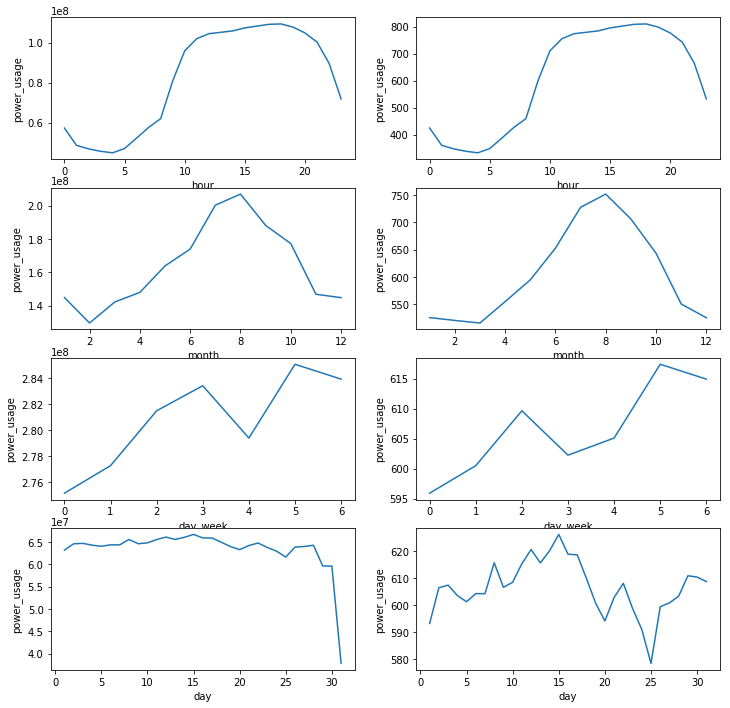

<Figure size 320x160 with 0 Axes>

In [43]:
fig = plt.figure()
plt.figure(figsize=(4,2), dpi=80,facecolor='w', edgecolor='k')

# Hour
ax1 = fig.add_subplot(4, 2, 1)
#ax1.scatter("hour", "power_usage")

ax1.plot("hour", "power_usage",data=hourly_total_value)
ax1.set_xlabel("hour")
ax1.set_ylabel("power_usage")

#x1 = hourly_total_value["hour"]
#y1 = hourly_total_value["power_usage"]
#hourly_total_value2.plot(x="hour", y="power_usage")
#ax1.scatter(x1,y1)
#ax1.plot(x1,y1)

ax1 = fig.add_subplot(4, 2, 2)

ax1.plot("hour", "power_usage",data=hourly_total_value2)
ax1.set_xlabel("hour")
ax1.set_ylabel("power_usage")

#Month
ax1 = fig.add_subplot(4, 2, 3)
ax1.plot("month", "power_usage",data=monthly_total_value)
ax1.set_xlabel("month")
ax1.set_ylabel("power_usage")

ax1 = fig.add_subplot(4, 2, 4)
ax1.plot("month", "power_usage",data=monthly_total_value2)
ax1.set_xlabel("month")
ax1.set_ylabel("power_usage")

#Day_Week (Numeric)
ax1 = fig.add_subplot(4, 2, 5)
ax1.plot("day_week", "power_usage",data=day_week_total_value3)
ax1.set_xlabel("day_week")
ax1.set_ylabel("power_usage")

ax1 = fig.add_subplot(4, 2, 6)
ax1.plot("day_week", "power_usage",data=day_week_total_value4)
ax1.set_xlabel("day_week")
ax1.set_ylabel("power_usage")

#Day 
ax1 = fig.add_subplot(4, 2, 7)
ax1.plot("day", "power_usage",data=daily_total_value)
ax1.set_xlabel("day")
ax1.set_ylabel("power_usage")

ax1 = fig.add_subplot(4, 2, 8)
ax1.plot("day", "power_usage",data=daily_total_value2)
ax1.set_xlabel("day")
ax1.set_ylabel("power_usage")


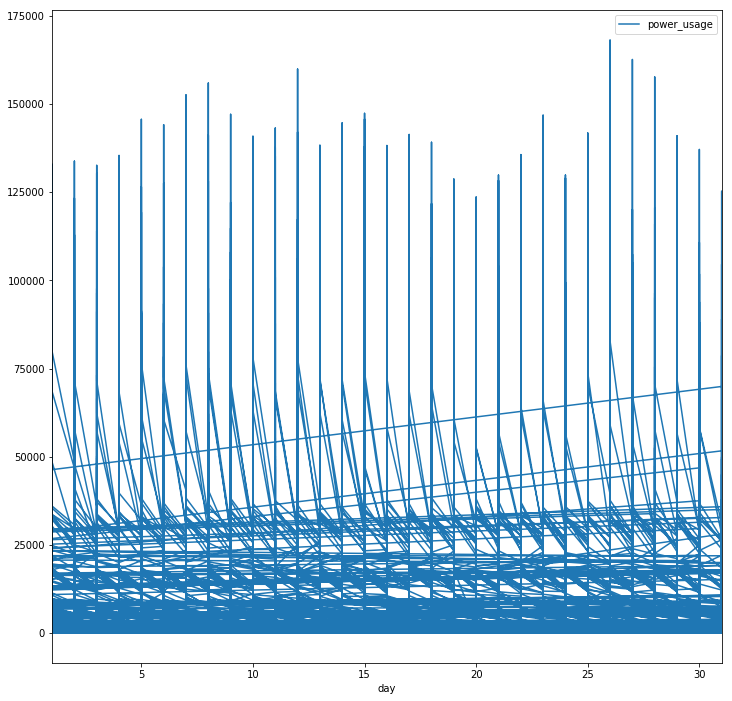

In [44]:
data.plot(x="day", y="power_usage")
#data.plot(x="time", y="power_usage")
#data.plot(x="hour", y="power_usage")
#data.plot(x="month", y="power_usage")


### ヒント2: Pandasによるデータの集計2: 要素数カウント

ヒント:  data.groupby([キーとなる列名]).aggregate({"集計対象の列名":集計関数}).reset_index()

In [45]:
data_non_zero = data[data["power_usage"] > 0]
hourly_total_count = data_non_zero.groupby(["hour"])["customer_id"].nunique()

In [48]:
display(hourly_total_count)
hourly_total_count

hour
0     369
1     369
2     369
3     369
4     369
5     369
6     369
7     369
8     369
9     369
10    369
11    369
12    369
13    369
14    369
15    369
16    369
17    369
18    369
19    369
20    369
21    369
22    369
23    369
Name: customer_id, dtype: int64

hour
0     369
1     369
2     369
3     369
4     369
5     369
6     369
7     369
8     369
9     369
10    369
11    369
12    369
13    369
14    369
15    369
16    369
17    369
18    369
19    369
20    369
21    369
22    369
23    369
Name: customer_id, dtype: int64

### ヒント3: Pandasによるデータの集計3: pivot table

使い方:  pd.pivot_table(data, columns="横持ちする列", index="集計するキー", values="集計対象する列", aggfunc=集計関数).reset_index()

In [53]:
hour_df = pd.pivot_table(data, columns="hour",
                         index="customer_id", values="power_usage", aggfunc=np.mean).reset_index()

display(hour_df)

hour,customer_id,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,MT_001,4.048748,4.175652,4.132192,4.154792,4.231281,4.140884,4.162614,4.298208,4.306030,...,3.837530,4.162611,3.436827,3.365554,3.859260,3.686289,3.714104,4.011373,4.024411,4.080909
1,MT_002,23.890282,20.988325,20.043257,19.620422,20.051056,21.330794,24.087572,29.665429,30.309441,...,28.220058,27.033362,26.793686,27.324190,28.852379,31.352915,31.714865,29.049673,26.507728,25.382417
2,MT_003,1.728099,1.594802,1.506731,1.666211,1.697155,1.789987,1.728099,1.728099,1.789987,...,1.604918,1.604918,1.728099,1.789987,2.007189,1.759043,1.913167,1.728099,1.728099,1.728099
3,MT_004,133.057692,111.364081,101.322595,98.188881,95.064919,91.473199,82.706892,91.313094,95.996258,...,103.937015,105.395969,106.832647,116.109855,143.411049,182.560719,184.888354,176.756908,166.540016,147.722460
4,MT_005,58.155697,52.071502,48.311062,46.639660,45.351654,45.815236,42.641163,43.120615,42.748914,...,43.509022,46.626295,47.561813,52.188441,61.171077,69.363535,69.684283,70.497838,72.255270,67.880054
5,MT_006,171.267542,145.060743,134.006032,126.290345,123.020639,119.098570,116.731887,136.794686,164.181734,...,200.617668,191.888879,182.316109,184.061064,214.705653,258.510681,273.683138,264.263285,246.192107,210.852888
6,MT_007,6.644881,5.925104,5.739256,5.656786,5.614582,5.506945,5.042320,4.974949,4.932359,...,4.954428,4.800715,4.839046,5.142600,5.978921,6.934495,7.574514,7.806437,8.045718,7.634914
7,MT_008,223.923949,199.040436,184.048061,213.008873,196.653555,197.901190,177.281775,195.329817,219.675995,...,255.451523,252.665676,251.853906,264.065047,299.185625,334.769749,330.374191,305.571393,286.667764,258.318085
8,MT_009,48.757058,46.018527,44.231957,43.212940,42.531601,44.126580,37.659251,34.427383,50.095792,...,40.590570,45.142012,45.442568,46.335853,57.317513,72.518928,78.021129,67.180770,61.839023,54.572994
9,MT_010,52.501107,48.548387,46.363974,45.676834,45.145826,44.399031,37.211667,34.859332,39.871115,...,64.511707,62.856092,59.731919,58.492422,64.223746,69.125797,66.227727,65.433793,64.449846,58.007808


0時~23時の列を抽出する

In [54]:
target_cols = list(range(0,24))
hour_df2 = hour_df[target_cols]
display(hour_df2)
hour_df2.head()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,4.048748,4.175652,4.132192,4.154792,4.231281,4.140884,4.162614,4.298208,4.306030,6.371255,...,3.837530,4.162611,3.436827,3.365554,3.859260,3.686289,3.714104,4.011373,4.024411,4.080909
1,23.890282,20.988325,20.043257,19.620422,20.051056,21.330794,24.087572,29.665429,30.309441,29.934823,...,28.220058,27.033362,26.793686,27.324190,28.852379,31.352915,31.714865,29.049673,26.507728,25.382417
2,1.728099,1.594802,1.506731,1.666211,1.697155,1.789987,1.728099,1.728099,1.789987,1.820335,...,1.604918,1.604918,1.728099,1.789987,2.007189,1.759043,1.913167,1.728099,1.728099,1.728099
3,133.057692,111.364081,101.322595,98.188881,95.064919,91.473199,82.706892,91.313094,95.996258,101.727695,...,103.937015,105.395969,106.832647,116.109855,143.411049,182.560719,184.888354,176.756908,166.540016,147.722460
4,58.155697,52.071502,48.311062,46.639660,45.351654,45.815236,42.641163,43.120615,42.748914,41.472604,...,43.509022,46.626295,47.561813,52.188441,61.171077,69.363535,69.684283,70.497838,72.255270,67.880054
5,171.267542,145.060743,134.006032,126.290345,123.020639,119.098570,116.731887,136.794686,164.181734,179.717053,...,200.617668,191.888879,182.316109,184.061064,214.705653,258.510681,273.683138,264.263285,246.192107,210.852888
6,6.644881,5.925104,5.739256,5.656786,5.614582,5.506945,5.042320,4.974949,4.932359,5.020637,...,4.954428,4.800715,4.839046,5.142600,5.978921,6.934495,7.574514,7.806437,8.045718,7.634914
7,223.923949,199.040436,184.048061,213.008873,196.653555,197.901190,177.281775,195.329817,219.675995,255.898918,...,255.451523,252.665676,251.853906,264.065047,299.185625,334.769749,330.374191,305.571393,286.667764,258.318085
8,48.757058,46.018527,44.231957,43.212940,42.531601,44.126580,37.659251,34.427383,50.095792,63.641158,...,40.590570,45.142012,45.442568,46.335853,57.317513,72.518928,78.021129,67.180770,61.839023,54.572994
9,52.501107,48.548387,46.363974,45.676834,45.145826,44.399031,37.211667,34.859332,39.871115,46.297691,...,64.511707,62.856092,59.731919,58.492422,64.223746,69.125797,66.227727,65.433793,64.449846,58.007808


hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,4.048748,4.175652,4.132192,4.154792,4.231281,4.140884,4.162614,4.298208,4.306030,6.371255,...,3.837530,4.162611,3.436827,3.365554,3.859260,3.686289,3.714104,4.011373,4.024411,4.080909
1,23.890282,20.988325,20.043257,19.620422,20.051056,21.330794,24.087572,29.665429,30.309441,29.934823,...,28.220058,27.033362,26.793686,27.324190,28.852379,31.352915,31.714865,29.049673,26.507728,25.382417
2,1.728099,1.594802,1.506731,1.666211,1.697155,1.789987,1.728099,1.728099,1.789987,1.820335,...,1.604918,1.604918,1.728099,1.789987,2.007189,1.759043,1.913167,1.728099,1.728099,1.728099
3,133.057692,111.364081,101.322595,98.188881,95.064919,91.473199,82.706892,91.313094,95.996258,101.727695,...,103.937015,105.395969,106.832647,116.109855,143.411049,182.560719,184.888354,176.756908,166.540016,147.722460
4,58.155697,52.071502,48.311062,46.639660,45.351654,45.815236,42.641163,43.120615,42.748914,41.472604,...,43.509022,46.626295,47.561813,52.188441,61.171077,69.363535,69.684283,70.497838,72.255270,67.880054


### 横軸に「時間」、縦軸に時間あたり消費電力量の平均の折れ線グラフ

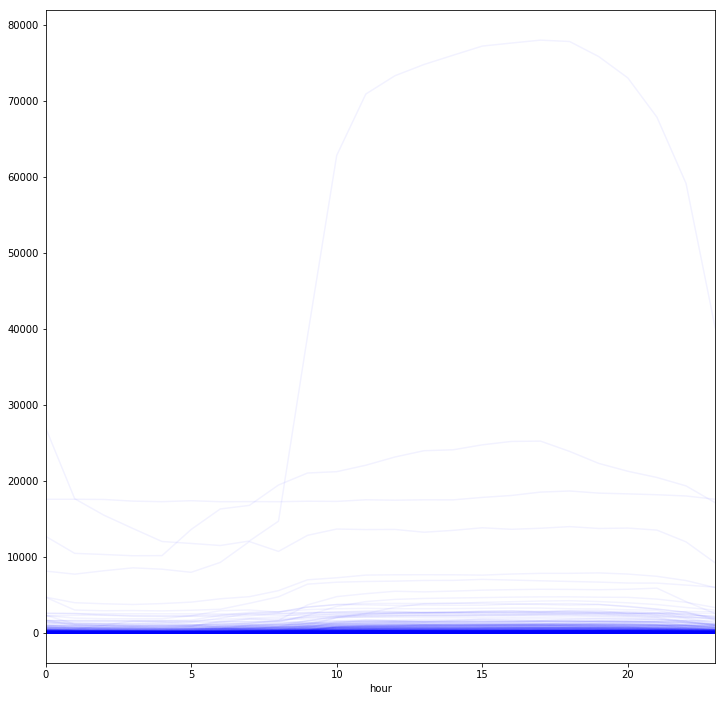

In [55]:
hour_df2.T.plot(color='blue', alpha=0.05, legend=False)

大口顧客と小口顧客が混ざっているので見にくいですね。

## ヒント4: 平均0, 標準偏差1で標準化

### StandardScalerで平均0、標準偏差1で標準化する
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
scaler = StandardScaler()

In [64]:
hour_df2_std = scaler.fit_transform(hour_df2.T)
hour_df2_std

array([[-0.01714443, -0.73934763,  0.16185793, ...,  0.64694004,
        -0.81240125, -0.26830109],
       [ 0.21393924, -1.50883951, -0.99679486, ..., -0.0351609 ,
        -1.04047943, -0.26219043],
       [ 0.13480184, -1.75943679, -1.76233331, ..., -0.94352163,
        -0.98452414, -0.32140018],
       ...,
       [-0.08520311,  0.62873279,  0.16185793, ...,  1.02729066,
         0.0896317 ,  1.12089191],
       [-0.06146117, -0.04529742,  0.16185793, ...,  0.78922416,
        -0.24265962,  0.74162065],
       [ 0.04141825, -0.34368833,  0.16185793, ...,  0.53926081,
        -0.53303471, -0.26219194]])

In [65]:
hour_df_std = pd.DataFrame(hour_df2_std).T
hour_df_std.columns = list(range(0, 24))
hour_df_std.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,-0.017144,0.213939,0.134802,0.175954,0.315236,0.150629,0.190197,0.437106,0.451350,4.211995,...,-0.401760,0.190193,-1.131415,-1.261199,-0.362190,-0.677160,-0.626510,-0.085203,-0.061461,0.041418
1,-0.739348,-1.508840,-1.759437,-1.871557,-1.757369,-1.418030,-0.687034,0.792009,0.962777,0.863442,...,0.408750,0.094082,0.030528,0.171198,0.576418,1.239468,1.335444,0.628733,-0.045297,-0.343688
2,0.161858,-0.996795,-1.762333,-0.376088,-0.107115,0.699804,0.161858,0.161858,0.699804,0.963604,...,-0.908861,-0.908861,0.161858,0.699804,2.587787,0.430831,1.770523,0.161858,0.161858,0.161858
3,0.405257,-0.324414,-0.662163,-0.767566,-0.872642,-0.993450,-1.288308,-0.998836,-0.841316,-0.648537,...,-0.574226,-0.525154,-0.476830,-0.164789,0.753496,2.070308,2.148598,1.875095,1.531446,0.898512
4,0.597543,0.006715,-0.358456,-0.520763,-0.645840,-0.600822,-0.909052,-0.862493,-0.898588,-1.022529,...,-0.824775,-0.522061,-0.431214,0.018071,0.890362,1.685921,1.717068,1.796071,1.966733,1.541862


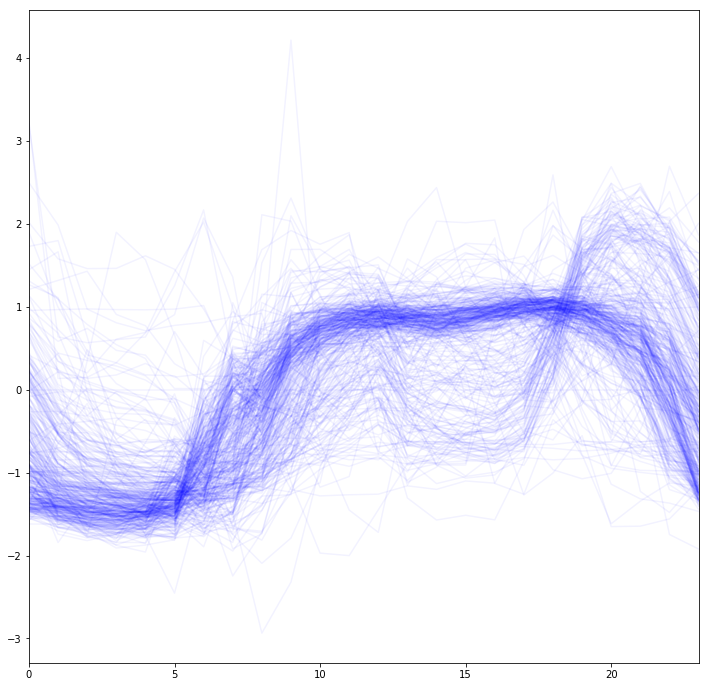

In [66]:
hour_df_std.T.plot(color='blue', alpha=0.05, legend=False)

## ヒント5:  クラスタリング

In [68]:
from sklearn.cluster import KMeans

ElbowMethodで最適なクラスター数をみてみましょう

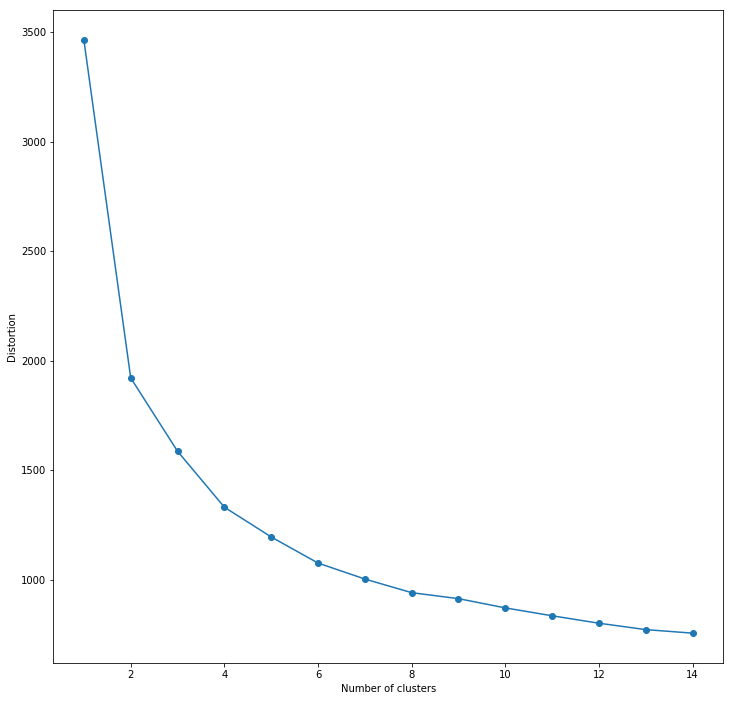

In [69]:
distortions = []

for i in range(1, 15):
    km = KMeans(n_clusters=i, random_state=1234)
    km.fit(hour_df_std)
    distortions.append(km.inertia_)

plt.plot(range(1, 15), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

今回はクラスター数：2として、試しにやってみましょう。

In [83]:
km = KMeans(n_clusters=2, random_state=1234)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=1234, tol=0.0001, verbose=0)

In [85]:
km.fit(hour_df_std)
dbclus = km.predict(hour_df_std)
display(dbclus)

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [105]:
hour_df_std["cluster_labels"] = dbclus

#hour_df_std.columns()
display(hour_df_std)


,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,cluster_labels
0,-0.017144,0.213939,0.134802,0.175954,0.315236,0.150629,0.190197,0.437106,0.451350,4.211995,...,0.190193,-1.131415,-1.261199,-0.362190,-0.677160,-0.626510,-0.085203,-0.061461,0.041418,1
1,-0.739348,-1.508840,-1.759437,-1.871557,-1.757369,-1.418030,-0.687034,0.792009,0.962777,0.863442,...,0.094082,0.030528,0.171198,0.576418,1.239468,1.335444,0.628733,-0.045297,-0.343688,0
2,0.161858,-0.996795,-1.762333,-0.376088,-0.107115,0.699804,0.161858,0.161858,0.699804,0.963604,...,-0.908861,0.161858,0.699804,2.587787,0.430831,1.770523,0.161858,0.161858,0.161858,1
3,0.405257,-0.324414,-0.662163,-0.767566,-0.872642,-0.993450,-1.288308,-0.998836,-0.841316,-0.648537,...,-0.525154,-0.476830,-0.164789,0.753496,2.070308,2.148598,1.875095,1.531446,0.898512,1
4,0.597543,0.006715,-0.358456,-0.520763,-0.645840,-0.600822,-0.909052,-0.862493,-0.898588,-1.022529,...,-0.522061,-0.431214,0.018071,0.890362,1.685921,1.717068,1.796071,1.966733,1.541862,1
5,-0.326682,-0.892807,-1.131614,-1.298290,-1.368923,-1.453649,-1.504774,-1.071373,-0.479751,-0.144153,...,0.118785,-0.088008,-0.050313,0.611679,1.557966,1.885725,1.682235,1.291857,0.528451,1
6,0.784350,0.061741,-0.124838,-0.207633,-0.250002,-0.358064,-0.824517,-0.892152,-0.934910,-0.846285,...,-1.067072,-1.028590,-0.723842,0.115770,1.075104,1.717640,1.950477,2.190699,1.778278,1
7,-0.602173,-1.152832,-1.484606,-0.843718,-1.205653,-1.178043,-1.634341,-1.234947,-0.696178,0.105418,...,0.033868,0.015904,0.286130,1.063331,1.850790,1.753519,1.204645,0.786317,0.158953,1
8,-0.188707,-0.438960,-0.602222,-0.695342,-0.757604,-0.611851,-1.202851,-1.498187,-0.066370,1.171437,...,-0.519058,-0.491593,-0.409962,0.593568,1.982709,2.485513,1.494895,1.006754,0.342767,1
9,-0.221889,-0.608088,-0.821515,-0.888652,-0.940534,-1.013499,-1.715738,-1.945573,-1.455898,-0.827991,...,0.789842,0.484595,0.363491,0.923468,1.402421,1.119266,1.041695,0.945559,0.316142,1


In [91]:
## hour_df_std 

hour_df_std0 = hour_df_std["cluster_labels"==0]
hour_df_std1 = hour_df_std["cluster_labels"==1]

In [ ]:

hourly_total_value = data.groupby(["hour"]).aggregate(
    {"power_usage": np.sum}).reset_index()
print("hourly_total_value", hourly_total_value.shape)
hourly_total_value2 = data.groupby(["hour"]).aggregate(
    {"power_usage": np.mean}).reset_index()
print("hourly_total_value2", hourly_total_value2.shape)

monthly_total_value = data.groupby(["month"]).aggregate(
    {"power_usage": np.sum}).reset_index()
print("monthly_total_value", monthly_total_value.shape)
monthly_total_value2 = data.groupby(["month"]).aggregate(
    {"power_usage": np.mean}).reset_index()
print("monthly_total_value2", monthly_total_value2.shape)

dayofweek_total_value5 = data.groupby(["dayofweek"]).aggregate(
    {"power_usage": np.sum}).reset_index()
print("dayofweek_total_value5", dayofweek_total_value5.shape)
dayofweek_total_value6 = data.groupby(["dayofweek"]).aggregate(
    {"power_usage": np.mean}).reset_index()
print("dayofweek_total_value6", dayofweek_total_value6.shape)

day_week_total_value3 = data.groupby(["day_week"]).aggregate(
    {"power_usage": np.sum}).reset_index()
print("day_week_total_value3", day_week_total_value3.shape)
day_week_total_value4 = data.groupby(["day_week"]).aggregate(
    {"power_usage": np.mean}).reset_index()
print("day_week_total_value4", day_week_total_value4.shape)
day_week_total_value = data.groupby(["day_week"]).aggregate(
    {"power_usage": np.sum}).reset_index().T
print("day_week_total_value", day_week_total_value.shape)
day_week_total_value2 = data.groupby(["day_week"]).aggregate(
    {"power_usage": np.mean}).reset_index().T
print("day_week_total_value2", day_week_total_value2.shape)

daily_total_value = data.groupby(["day"]).aggregate(
    {"power_usage": np.sum}).reset_index()
print("daily_total_value", daily_total_value.shape)
daily_total_value2 = data.groupby(["day"]).aggregate(
    {"power_usage": np.mean}).reset_index()
print("daily_total_value2", daily_total_value2.shape)

display(day_week_total_value3)
display(day_week_total_value4)
display(day_week_total_value)
display(day_week_total_value2)

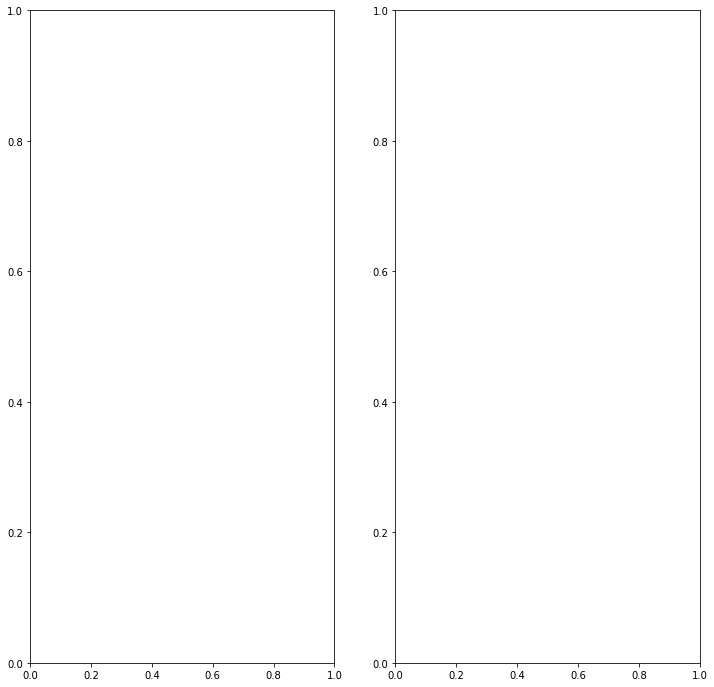

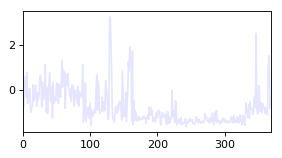

In [100]:
fig = plt.figure()
plt.figure(figsize=(4,2), dpi=80,facecolor='w', edgecolor='k')

# Hour
ax2 = fig.add_subplot(1, 2, 1)
#ax2.plot(data=hour_df_std0.T)
hour_df_std0.T.plot(color='blue', alpha=0.05, legend=False)
#ax2.set_xlabel("hour")
#ax2.set_ylabel("power_usage")

ax2 = fig.add_subplot(1, 2, 2)
hour_df_std1.T.plot(color='blue', alpha=0.05, legend=False)
#ax2.plot("hour", "power_usage",data=hour_df_std1)
#ax2.set_xlabel("hour")
#ax2.set_ylabel("power_usage")

#Month
#ax1 = fig.add_subplot(4, 2, 2)
#ax1.plot("month", "power_usage",data=monthly_total_value)
#ax1.set_xlabel("month")
#ax1.set_ylabel("power_usage")

#ax1 = fig.add_subplot(4, 2, 4)
#ax1.plot("month", "power_usage",data=monthly_total_value2)
#ax1.set_xlabel("month")
#ax1.set_ylabel("power_usage")

#Day_Week (Numeric)
#ax1 = fig.add_subplot(4, 2, 5)
#ax1.plot("day_week", "power_usage",data=day_week_total_value3)
#ax1.set_xlabel("day_week")
#ax1.set_ylabel("power_usage")

#ax1 = fig.add_subplot(4, 2, 6)
#ax1.plot("day_week", "power_usage",data=day_week_total_value4)
#ax1.set_xlabel("day_week")
#ax1.set_ylabel("power_usage")

#Day 
#ax1 = fig.add_subplot(4, 2, 7)
#ax1.plot("day", "power_usage",data=daily_total_value)
#ax1.set_xlabel("day")
#ax1.set_ylabel("power_usage")

#ax1 = fig.add_subplot(4, 2, 8)
#ax1.plot("day", "power_usage",data=daily_total_value2)
#ax1.set_xlabel("day")
#ax1.set_ylabel("power_usage")

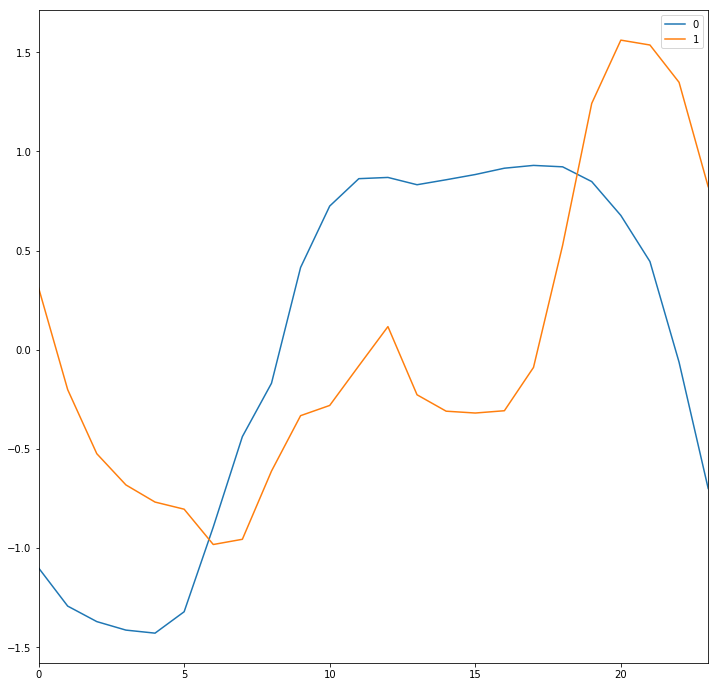

In [72]:
pd.DataFrame(km.cluster_centers_).T.plot()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,-1.099619,-1.292141,-1.370334,-1.413192,-1.428553,-1.320671,-0.893586,-0.437625,-0.168741,0.415254,...,0.857538,0.883908,0.915726,0.929896,0.922730,0.848325,0.677622,0.445098,-0.062377,-0.698753
1,0.312743,-0.200809,-0.523827,-0.681147,-0.767594,-0.803553,-0.981609,-0.955301,-0.611534,-0.331945,...,-0.309403,-0.318660,-0.307109,-0.088737,0.526793,1.242436,1.561524,1.536918,1.348764,0.822854


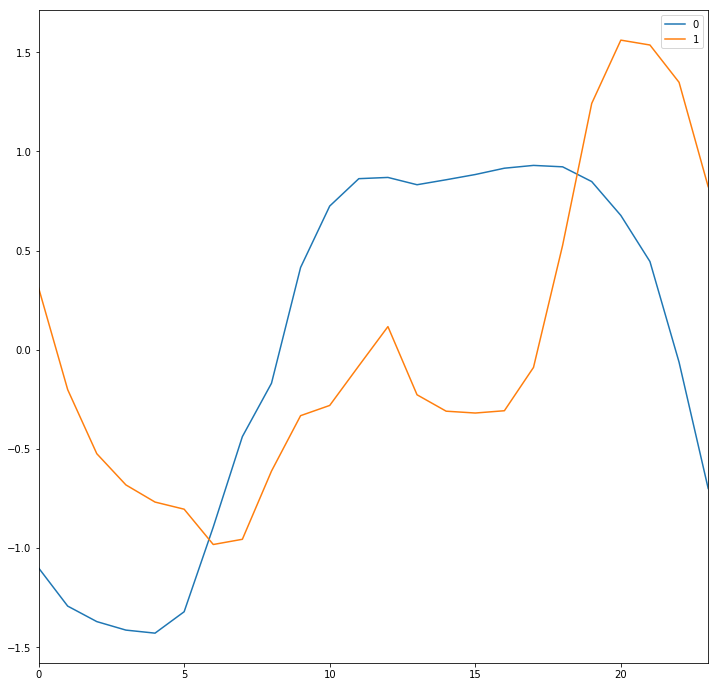

In [82]:
dbclus = pd.DataFrame(km.cluster_centers_)
display(dbclus)
dbclus.T.plot()


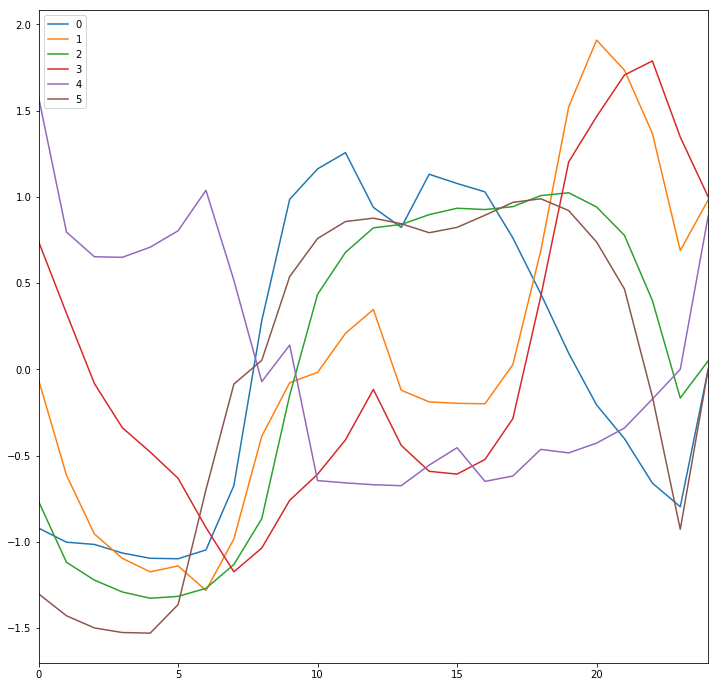

In [82]:
km6 = KMeans(n_clusters=6, random_state=1234)
km6.fit(hour_df_std)
pd.DataFrame(km6.cluster_centers_).T.plot()

In [73]:
cluster_labels = km.predict(hour_df_std)
np.bincount(cluster_labels)

array([274,  96], dtype=int64)

In [74]:
hour_df_std["cluster_labels"] = cluster_labels

In [75]:
hour_df_std.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,cluster_labels
0,-0.017144,0.213939,0.134802,0.175954,0.315236,0.150629,0.190197,0.437106,0.451350,4.211995,...,0.190193,-1.131415,-1.261199,-0.362190,-0.677160,-0.626510,-0.085203,-0.061461,0.041418,1
1,-0.739348,-1.508840,-1.759437,-1.871557,-1.757369,-1.418030,-0.687034,0.792009,0.962777,0.863442,...,0.094082,0.030528,0.171198,0.576418,1.239468,1.335444,0.628733,-0.045297,-0.343688,0
2,0.161858,-0.996795,-1.762333,-0.376088,-0.107115,0.699804,0.161858,0.161858,0.699804,0.963604,...,-0.908861,0.161858,0.699804,2.587787,0.430831,1.770523,0.161858,0.161858,0.161858,1
3,0.405257,-0.324414,-0.662163,-0.767566,-0.872642,-0.993450,-1.288308,-0.998836,-0.841316,-0.648537,...,-0.525154,-0.476830,-0.164789,0.753496,2.070308,2.148598,1.875095,1.531446,0.898512,1
4,0.597543,0.006715,-0.358456,-0.520763,-0.645840,-0.600822,-0.909052,-0.862493,-0.898588,-1.022529,...,-0.522061,-0.431214,0.018071,0.890362,1.685921,1.717068,1.796071,1.966733,1.541862,1


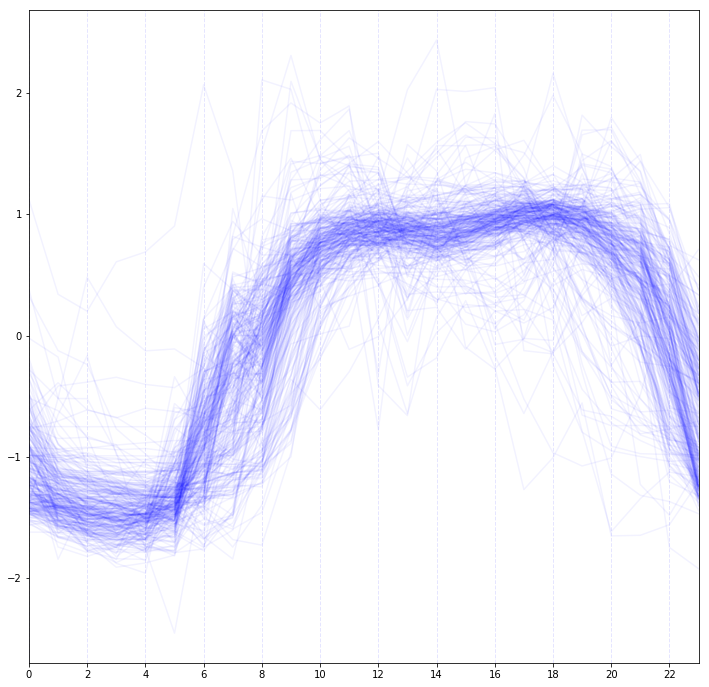

In [76]:
ax = hour_df_std[hour_df_std["cluster_labels"] == 0][list(
    range(0, 24))].T.plot(color='blue', alpha=0.05, legend=False)
ax.set_xticks(list(range(0, 24, 2)))
ax.grid(which="major", axis="x", color="blue",
        alpha=0.1, linestyle="--", linewidth=1)

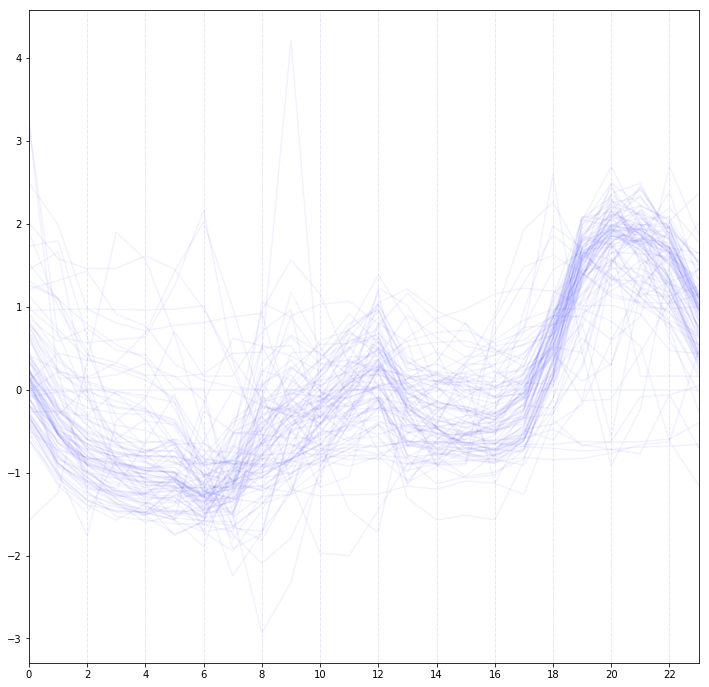

In [77]:
ax = hour_df_std[hour_df_std["cluster_labels"] == 1][list(
    range(0, 24))].T.plot(color='blue', alpha=0.05, legend=False)
ax.set_xticks(list(range(0, 24, 2)))
ax.grid(which="major", axis="x", color="blue",
        alpha=0.1, linestyle="--", linewidth=1)

In [77]:
agg_df = hour_df.copy()

In [78]:
agg_df["cluster_labels"] = cluster_labels

In [79]:
agg_pt = agg_df.groupby(["cluster_labels"]).aggregate(
    {"customer_id": "nunique"})

In [80]:
agg_pt

,customer_id
cluster_labels,
0,274
1,96


## クラスタリングのパターン
- クラスター0：グラフからは9時〜20時の日中から夜までよく電力を使う顧客, 顧客数259
- クラスター1：グラフからは18時〜22時の夜によく電力を使う顧客, 顧客数111